In [13]:
import numpy as np
from qiskit import *
%matplotlib inline

# Kwantowe błądzenie losowe
## Sprawdzenie działania bramek inkrementacji i dekrementacji


### Bramka increment

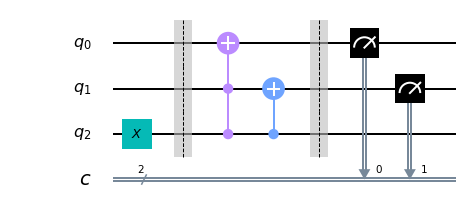

In [14]:
circ = QuantumCircuit(3,2)
circ.x(2)
circ.barrier()
circ.ccx(2,1,0)
circ.cx(2,1)
circ.barrier()

circ.measure(0,0)
circ.measure(1,1)
circ.draw()

Wizualizacja state_city

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]


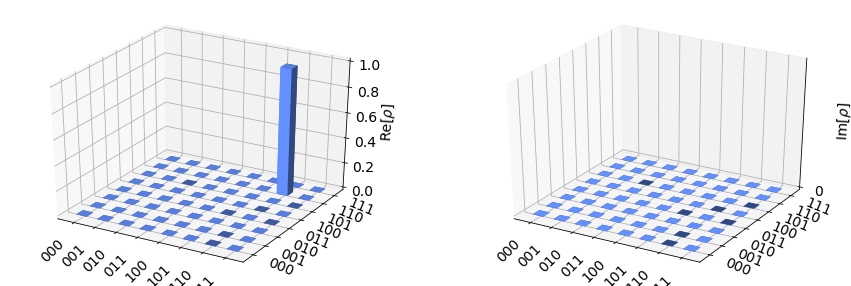

In [15]:
from qiskit import Aer
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

Wykonanie bramki w symulatorze i rzeczywistym komputerze kwantowymm

Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


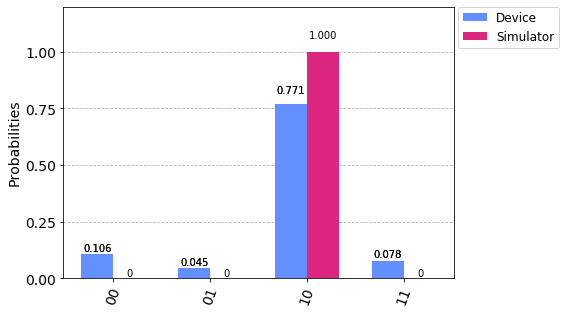

In [16]:
shots = 4096
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=shots)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)

from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
# provider.backends()

backend = provider.get_backend('ibmq_london')

from qiskit.tools.monitor import job_monitor

job_exp = execute(circ, backend=backend, shots=shots)
job_monitor(job_exp)

result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
from qiskit.visualization import plot_histogram
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

Obserwujemy przejście do stanu 01 czyli w prawo.

### Decrement

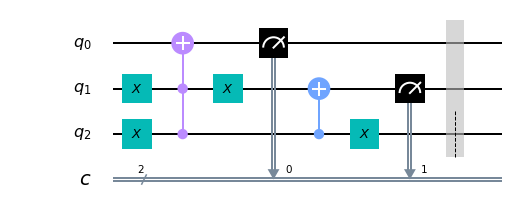

In [20]:
circ = QuantumCircuit(3,2)
circ.x(1)
circ.x(2)
circ.ccx(2,1,0)
circ.x(1)
circ.cx(2,1)
circ.x(2)
circ.barrier(2)
circ.measure(0,0)
circ.measure(1,1)
circ.draw()

Wizualizacja state_city

[0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


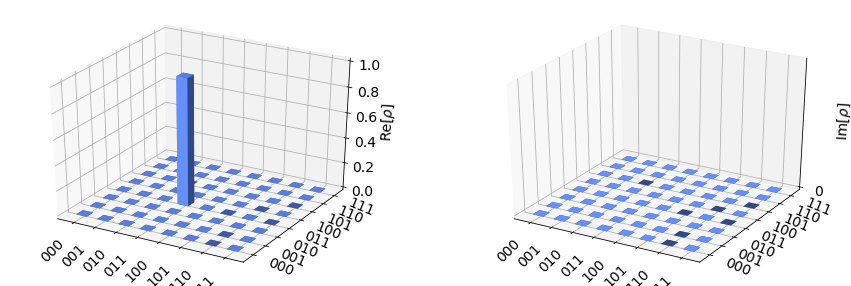

In [21]:
from qiskit import Aer
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

wykonanie bramki w symulatorze i rzeczywistym komputerze kwantowymm

Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


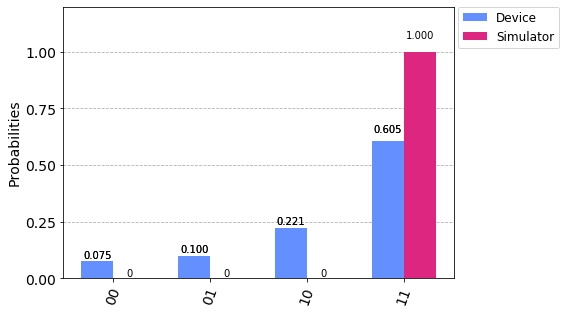

In [22]:
shots = 4096
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=shots)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)

from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
# provider.backends()

backend = provider.get_backend('ibmq_london')

from qiskit.tools.monitor import job_monitor

job_exp = execute(circ, backend=backend, shots=shots)
job_monitor(job_exp)

result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
from qiskit.visualization import plot_histogram
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

Obserwujemy przejście na pozycję 11 czyli w lewo.